## ConfigBox from Box Library

In [1]:
from box import ConfigBox

# Define a configuration dictionary
config_dict = {
    "database": {
        "host": "localhost",
        "port": 5432,
        "username": "admin",
        "password": "password123"
    },
    "logging": {
        "level": "INFO",
        "file_path": "/path/to/logs/logfile.log"
    },
    "app": {
        "name": "MyApp",
        "version": "1.0"
    }
}

# Create a ConfigBox instance
config = ConfigBox(config_dict)

# Access configuration values using attribute syntax
print(config.database.host)  # Output: localhost
print(config.logging.level)  # Output: INFO
print(config.app.version)    # Output: 1.0

# You can also access nested values
print(config.database.port)  # Output: 5432

# ConfigBox also supports dictionary-like access
print(config["app"]["name"])  # Output: MyApp

# Modify configuration values
config.app.version = "2.0"
print(config.app.version)  # Output: 2.0

# Add new configuration values
config.new_setting = "new_value"
print(config.new_setting)  # Output: new_value

localhost
INFO
1.0
5432
MyApp
2.0
new_value


In [2]:
d = {"roll":10, "name":"ajay"}

In [3]:
d2 = ConfigBox(d)

d2.name

'ajay'

## Ensure Library

In [4]:
from ensure import ensure_annotations, EnsureError

@ensure_annotations
def add(x: int, y: int) -> int:
    """Add two numbers and return the result."""
    return x + y

In [5]:
try:
    result = add(3, 4)  # This will work fine
    print("Result of addition:", result)

    result = add("hello", "world")  # This will raise an EnsureError
except EnsureError as e:
    print("Error:", e)
    print("Please provide integer arguments for addition.")

Result of addition: 7
Error: Argument x of type <class 'str'> to <function add at 0x0000018498D8DBC0> does not match annotation type <class 'int'>
Please provide integer arguments for addition.


# Text Summarization

### Pegasus (Pre-training with Extracted Gap-sentences for Abstractive Summarization) Model

In PEGASUS, important sentences are removed/masked from an input txt such as BERT and are generated together as one output sequence from the remaining sentences, similar to an extractive summary.

__Proposed by__ : Jingqing Zhang, Yao Zhao, Mohammad Saleh and Peter J. Liu on Dec 18, 2019.

Paper Link : https://arxiv.org/pdf/1912.08777.pdf

### Base architecture of PEGASUS

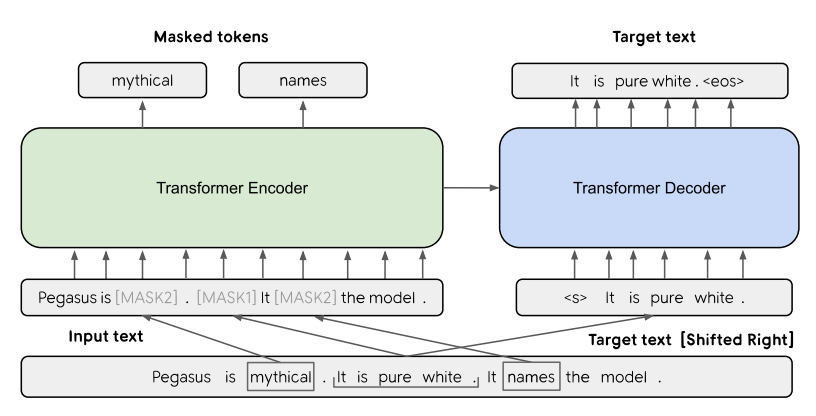

### Keypoints from Paper

1. The paper introduces a new pre-training objective, Gap Sentences Generation (GSG), for abstractive text summarization.
2. The authors evaluate their model on 12 downstream summarization tasks, achieving state-of-the-art performance.
3. The model also shows strong performance on low-resource summarization, surpassing previous state-of-the-art results.
4. The paper validates the results using human evaluation, showing that the model summaries achieve human performance on multiple datasets.
5. The authors use the PEGASUS model to train a 568M parameter model that surpasses or is on-par with the state-of-the-art on all 12 downstream datasets considered.
6. The paper also demonstrates how good abstractive summarization performance can be achieved with very little supervision.

__[Google Research Blog on PEGASUS](https://research.google/blog/pegasus-a-state-of-the-art-model-for-abstractive-text-summarization)__

![image.png](https://storage.googleapis.com/gweb-research2023-media/original_images/7b3d110a1c4c1c1f419143ba53e21a9a-image1.gif)  
*A self-supervised example for PEGASUS during pre-training. The model is trained to output all the masked sentences*

### PEGASUS : Inference from base model

In [12]:
input_txt = """
Bidirectional Encoder Representations from Transformers (BERT) is a language model based on the transformer architecture, notable for its dramatic improvement over previous state of the art models. It was introduced in October 2018 by researchers at Google.[1][2] A 2020 literature survey concluded that "in a little over a year, BERT has become a ubiquitous baseline in Natural Language Processing (NLP) experiments counting over 150 research publications analyzing and improving the model."[3]

BERT was originally implemented in the English language at two model sizes:[1] (1) BERTBASE: 12 encoders with 12 bidirectional self-attention heads totaling 110 million parameters, and (2) BERTLARGE: 24 encoders with 16 bidirectional self-attention heads totaling 340 million parameters. Both models were pre-trained on the Toronto BookCorpus[4] (800M words) and English Wikipedia (2,500M words).

Design
BERT is an "encoder-only" transformer architecture.

On a high level, BERT consists of three modules:

embedding. This module converts an array of one-hot encoded tokens into an array of vectors representing the tokens.
a stack of encoders. These encoders are the Transformer encoders. They perform transformations over the array of representation vectors.
un-embedding. This module converts the final representation vectors into one-hot encoded tokens again.
The un-embedding module is necessary for pretraining, but it is often unnecessary for downstream tasks. Instead, one would take the representation vectors output at the end of the stack of encoders, and use those as a vector representation of the text input, and train a smaller model on top of that.

BERT uses WordPiece to convert each English word into an integer code. Its vocabulary has size 30,000. Any token not appearing in its vocabulary is replaced by [UNK] for "unknown".

Pretraining
BERT was pre-trained simultaneously on two tasks:[5]

language modeling: 15% of tokens were selected for prediction, and the training objective was to predict the selected token given its context. The selected token is

replaced with a [MASK] token with probability 80%,
replaced with a random word token with probability 10%,
not replaced with probability 10%.
For example, the sentence "my dog is cute" may have the 4-th token selected for prediction. The model would have input text

"my dog is [MASK]" with probability 80%,
"my dog is happy" with probability 10%,
"my dog is cute" with probability 10%.
After processing the input text, the model's 4-th output vector is passed to a separate neural network, which outputs a probability distribution over its 30,000-large vocabulary.

next sentence prediction: Given two spans of text, the model predicts if these two spans appeared sequentially in the training corpus, outputting either [IsNext] or [NotNext]. The first span starts with a special token [CLS] (for "classify"). The two spans are separated by a special token [SEP] (for "separate"). After processing the two spans, the 1-st output vector (the vector coding for [CLS]) is passed to a separate neural network for the binary classification into [IsNext] and [NotNext].

For example, given "[CLS] my dog is cute [SEP] he likes playing" the model should output token [IsNext].
Given "[CLS] my dog is cute [SEP] how do magnets work" the model should output token [NotNext].
As a result of this training process, BERT learns latent representations of words and sentences in context. After pre-training, BERT can be fine-tuned with fewer resources on smaller datasets to optimize its performance on specific tasks such as NLP tasks (language inference, text classification) and sequence-to-sequence based language generation tasks (question-answering, conversational response generation).[1][6] The pre-training stage is significantly more computationally expensive than fine-tuning.

Architecture details
This section describes BERTBASE. The other one, BERTLARGE, is similar, just larger.

The lowest layer is the embedding layer, which contains three components: word_embeddings, position_embeddings, token_type_embeddings.

word_embeddings takes in a one-hot vector of the input token. The one-hot vector input has dimension 30,000, because BERT has a vocabulary size that large.
position_embeddings performs absolute position embedding. It is like word_embeddings, but on a vocabulary consisting of just the time-stamps 0 to 511, since BERT has a context window of 512.
token_type_embeddings is like word_embeddings, but on a vocabulary consisting of just 0 and 1. The only type-1 tokens are those that appear after the [SEP]. All other tokens are type-0.
The three outputs are added, then pushed through a LayerNorm (layer normalization), obtaining an array of representation vectors, each having 768 dimensions.

After this, the representation vectors move through 12 Transformer encoders, then they are un-embedded by an affine-Add & LayerNorm-linear.

Performance
When BERT was published, it achieved state-of-the-art performance on a number of natural language understanding tasks:[1]

GLUE (General Language Understanding Evaluation) task set (consisting of 9 tasks)
SQuAD (Stanford Question Answering Dataset[7]) v1.1 and v2.0
SWAG (Situations With Adversarial Generations[8])
Analysis
The reasons for BERT's state-of-the-art performance on these natural language understanding tasks are not yet well understood.[9][10] Current research has focused on investigating the relationship behind BERT's output as a result of carefully chosen input sequences,[11][12] analysis of internal vector representations through probing classifiers,[13][14] and the relationships represented by attention weights.[9][10] The high performance of the BERT model could also be attributed to the fact that it is bidirectionally trained. This means that BERT, based on the Transformer model architecture, applies its self-attention mechanism to learn information from a text from the left and right side during training, and consequently gains a deep understanding of the context. For example, the word fine can have two different meanings depending on the context (I feel fine today, She has fine blond hair). BERT considers the words surrounding the target word fine from the left and right side.

However it comes at a cost: due to encoder-only architecture lacking a decoder, BERT can't be prompted and can't generate text, while bidirectional models in general do not work effectively without the right side,[clarification needed] thus being difficult to prompt, with even short text generation requiring sophisticated computationally expensive techniques.[15]

In contrast to deep learning neural networks which require very large amounts of data, BERT has already been pre-trained which means that it has learnt the representations of the words and sentences as well as the underlying semantic relations that they are connected with. BERT can then be fine-tuned on smaller datasets for specific tasks such as sentiment classification. The pre-trained models are chosen according to the content of the given dataset one uses but also the goal of the task. For example, if the task is a sentiment classification task on financial data, a pre-trained model for the analysis of sentiment of financial text should be chosen. The weights of the original pre-trained models were released on GitHub.[16]

History
BERT was originally published by Google researchers Jacob Devlin, Ming-Wei Chang, Kenton Lee, and Kristina Toutanova. The design has its origins from pre-training contextual representations, including semi-supervised sequence learning,[17] generative pre-training, ELMo,[18] and ULMFit.[19] Unlike previous models, BERT is a deeply bidirectional, unsupervised language representation, pre-trained using only a plain text corpus. Context-free models such as word2vec or GloVe generate a single word embedding representation for each word in the vocabulary, whereas BERT takes into account the context for each occurrence of a given word. For instance, whereas the vector for "running" will have the same word2vec vector representation for both of its occurrences in the sentences "He is running a company" and "He is running a marathon", BERT will provide a contextualized embedding that will be different according to the sentence.[citation needed]

On October 25, 2019, Google announced that they had started applying BERT models for English language search queries within the US.[20] On December 9, 2019, it was reported that BERT had been adopted by Google Search for over 70 languages.[21] In October 2020, almost every single English-based query was processed by a BERT model.[22]

A later paper proposes RoBERTa, which preserves BERT's architecture, but improves its training, changing key hyperparameters, removing the next-sentence prediction task, and using much larger mini-batch sizes.[23]

Recognition
The research paper describing BERT won the Best Long Paper Award at the 2019 Annual Conference of the North American Chapter of the Association for Computational Linguistics (NAACL).[24]
"""

In [17]:
from transformers import PegasusForConditionalGeneration, AutoTokenizer
import torch

model_name = 'google/pegasus-large'
device = 'cuda' if torch.cuda.is_available() else 'cpu'
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = PegasusForConditionalGeneration.from_pretrained(model_name).to(device)
batch = tokenizer(input_txt, truncation=True, padding='longest', return_tensors="pt").to(device)
translated = model.generate(**batch)
summary_txt = tokenizer.batch_decode(translated, skip_special_tokens=True)

tokenizer_config.json:   0%|          | 0.00/88.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/3.09k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/1.91M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-large and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/260 [00:00<?, ?B/s]

In [23]:
import textwrap
print("-"*10, "BERT Summary by Pegasus-Large", "-"*10)
wrapped_text = textwrap.fill(summary_txt[0], width=50)
print(wrapped_text)

---------- BERT Summary by Pegasus-Large ----------
It was introduced in October 2018 by researchers
at Google.[1][2] A 2020 literature survey
concluded that "in a little over a year, BERT has
become a ubiquitous baseline in Natural Language
Processing (NLP) experiments counting over 150
research publications analyzing and improving the
model."[3] BERT was originally implemented in the
English language at two model sizes:[1] (1)
BERTBASE: 12 encoders with 12 bidirectional self-
attention heads totaling 110 million parameters,
and (2) BERTLARGE: 24 encoders with 16
bidirectional self-attention heads totaling 340
million parameters. This module converts an array
of one-hot encoded tokens into an array of vectors
representing the tokens.


### Fine-Tuning PEGASUS for text-summarization

In [6]:
from transformers import pipeline, set_seed
from datasets import load_dataset, load_from_disk
import matplotlib.pyplot as plt
from datasets import load_dataset
import pandas as pd
from datasets import load_dataset, load_metric

from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

import nltk
from nltk.tokenize import sent_tokenize

from tqdm import tqdm
import torch

nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\abhim\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

device = "cuda" if torch.cuda.is_available() else "cpu"
print("PyTorch Device:",device)

PyTorch Device: cuda


In [11]:
model_ckpt = "google/pegasus-cnn_dailymail"

tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

model_pegasus = AutoModelForSeq2SeqLM.from_pretrained(model_ckpt).to(device)

tokenizer_config.json:   0%|          | 0.00/88.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/1.91M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-cnn_dailymail and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/280 [00:00<?, ?B/s]